### Importing the neccesary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import pytz

1. Data valdation:

In [2]:
consumption_d = pd.read_csv('consumption_d.csv')
consumption_n = pd.read_csv('consumption_n.csv')

In [3]:
consumption_d.head()


,GMT,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
0,2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
consumption_n.head()


,GMT,N0000,N0001,N0002,N0003,N0004,N0005,N0006,N0007,N0008,...,N4163,N4164,N4165,N4166,N4167,N4168,N4169,N4170,N4171,N4172
0,2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Reshape Consumption Data

In [5]:

consumption_d_melted = pd.melt(consumption_d, id_vars=['GMT'], var_name='Household_id', value_name='Consumption')
consumption_n_melted = pd.melt(consumption_n, id_vars=['GMT'], var_name='Household_id', value_name='Consumption')

In [6]:
print("Total rows in consumption_d_melted:", consumption_d_melted.shape[0])
print("Total rows in consumption_n_melted:", consumption_n_melted.shape[0])



Total rows in consumption_d_melted: 40720175
Total rows in consumption_n_melted: 165780771


In [7]:
for df in [consumption_d_melted, consumption_n_melted]:
    df['GMT'] = pd.to_datetime(df['GMT'])


In [8]:
# 3. Time Series Features
for df in [consumption_d_melted, consumption_n_melted]:
    df['Hour_of_Day'] = df['GMT'].dt.hour
    df['Day_of_Week'] = df['GMT'].dt.dayofweek
    df['Month'] = df['GMT'].dt.month
    df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

In [9]:
# Printing the values for consumption_d_melted dataframe
print("Consumption D Melted Data:")
print(consumption_d_melted[['GMT', 'Hour_of_Day', 'Day_of_Week', 'Month', 'Is_Weekend']].head())

print("\n")  

# # Printing the values for consumption_n_melted dataframe
# print("Consumption N Melted Data:")
# print(consumption_n_melted[['GMT', 'Hour_of_Day', 'Day_of_Week', 'Month', 'Is_Weekend']].head())


Consumption D Melted Data:
                  GMT  Hour_of_Day  Day_of_Week  Month  Is_Weekend
0 2011-11-23 09:00:00            9            2     11           0
1 2011-11-23 09:30:00            9            2     11           0
2 2011-11-23 10:00:00           10            2     11           0
3 2011-11-23 10:30:00           10            2     11           0
4 2011-11-23 11:00:00           11            2     11           0




In [10]:
# 4. Merge Tariff Information
tariff_d = pd.read_csv('tariff_d.csv')
tariff_d['GMT'] = pd.to_datetime(tariff_d['GMT'])

# Extract time series features
tariff_d['Hour_of_Day'] = tariff_d['GMT'].dt.hour
tariff_d['Day_of_Week'] = tariff_d['GMT'].dt.dayofweek
tariff_d['Month'] = tariff_d['GMT'].dt.month
tariff_d['Is_Weekend'] = tariff_d['Day_of_Week'].isin([5, 6]).astype(int)

In [11]:
print("Date range in consumption_d_melted:", consumption_d_melted['GMT'].min(), "-", consumption_d_melted['GMT'].max())
print("Date range in tariff_d:", tariff_d['GMT'].min(), "-", tariff_d['GMT'].max())


Date range in consumption_d_melted: 2011-11-23 09:00:00 - 2014-02-28 00:00:00
Date range in tariff_d: 2013-01-01 00:30:00 - 2014-01-01 05:00:00


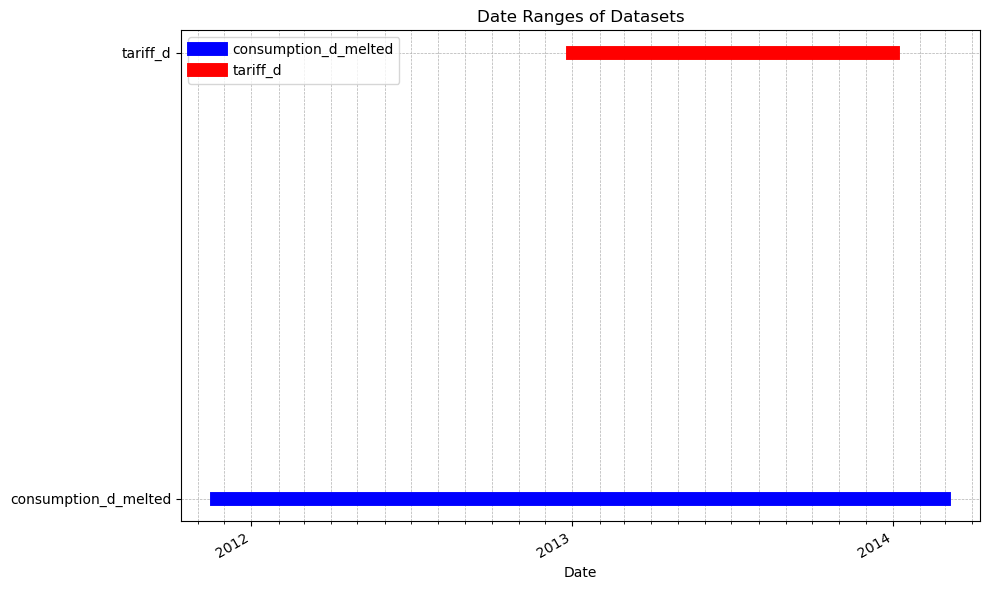

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming consumption_d_melted and tariff_d are already loaded in your environment
consumption_start = consumption_d_melted['GMT'].min()
consumption_end = consumption_d_melted['GMT'].max()

tariff_start = tariff_d['GMT'].min()
tariff_end = tariff_d['GMT'].max()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot date ranges as horizontal lines
ax.plot([consumption_start, consumption_end], [1, 1], color='blue', lw=10, label='consumption_d_melted')
ax.plot([tariff_start, tariff_end], [2, 2], color='red', lw=10, label='tariff_d')

# Formatting the plot
ax.set_yticks([1, 2])
ax.set_yticklabels(['consumption_d_melted', 'tariff_d'])
ax.set_xlabel('Date')
ax.set_title('Date Ranges of Datasets')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improving date formatting
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


In [12]:
print("Unique time intervals in consumption_d_melted:", consumption_d_melted['GMT'].diff().unique())
print("Unique time intervals in tariff_d:", tariff_d['GMT'].diff().unique())


Unique time intervals in consumption_d_melted: [             'NaT'      1800000000000 -71506800000000000]
Unique time intervals in tariff_d: [        'NaT' 1800000000000]


Filter data to only the overlapping period

The data for the year 2013 seems to be feasible

In [13]:
# Filtering both dataframes to the year 2013
start_date = '2013-01-01 00:00:00'
end_date = '2013-12-31 23:59:59'

consumption_d_melted_filtered = consumption_d_melted[(consumption_d_melted['GMT'] >= start_date) & (consumption_d_melted['GMT'] <= end_date)]
tariff_d_filtered = tariff_d[(tariff_d['GMT'] >= start_date) & (tariff_d['GMT'] <= end_date)]

In [14]:
merged_inner = consumption_d_melted.merge(tariff_d, on='GMT', how='inner')
print("Number of rows in merged_inner:", len(merged_inner))


Number of rows in merged_inner: 17968250


In [15]:
merged_inner.head()

,GMT,Household_id,Consumption,Hour_of_Day_x,Day_of_Week_x,Month_x,Is_Weekend_x,Price,Event_tags,Hour_of_Day_y,Day_of_Week_y,Month_y,Is_Weekend_y
0,2013-01-01 00:30:00,D0000,0.404,0,1,1,0,0.1176,NaN,0,1,1,0
1,2013-01-01 00:30:00,D0001,0.248,0,1,1,0,0.1176,NaN,0,1,1,0
2,2013-01-01 00:30:00,D0002,0.227,0,1,1,0,0.1176,NaN,0,1,1,0
3,2013-01-01 00:30:00,D0003,0.078,0,1,1,0,0.1176,NaN,0,1,1,0
4,2013-01-01 00:30:00,D0004,0.202,0,1,1,0,0.1176,NaN,0,1,1,0


Generating Consumption Metrics

In [52]:
# Daily aggregate:
daily_metrics = merged_inner.groupby(['Household_id', pd.Grouper(key='GMT', freq='D')]).agg({
    'Consumption': ['sum', 'mean', 'max', 'min', 'std'],
    'Price': ['mean', 'max', 'min'],
    'Event_tags': ['count']
}).reset_index()


In [53]:
daily_metrics.columns = ['Household_id', 'Date', 
                         'Daily_Consumption_Sum', 'Daily_Consumption_Mean', 'Daily_Consumption_Max', 'Daily_Consumption_Min', 'Daily_Consumption_Std', 
                         'Daily_Price_Mean', 'Daily_Price_Max', 'Daily_Price_Min',
                         'Daily_Event_Count']

In [56]:
# Aggregate data to find peak hour of the day for each household
hourly_metrics = merged_inner.groupby(['Household_id', pd.Grouper(key='GMT', freq='D'), 'Hour_of_Day_x']).agg({
    'Consumption': 'sum'
}).reset_index()

# Find the hour with maximum consumption for each household for each day
daily_peak_hour = hourly_metrics.loc[hourly_metrics.groupby(['Household_id', 'GMT'])['Consumption'].idxmax()].reset_index(drop=True)
daily_peak_hour.columns = ['Household_id', 'Date', 'Peak_Hour', 'Peak_Consumption']


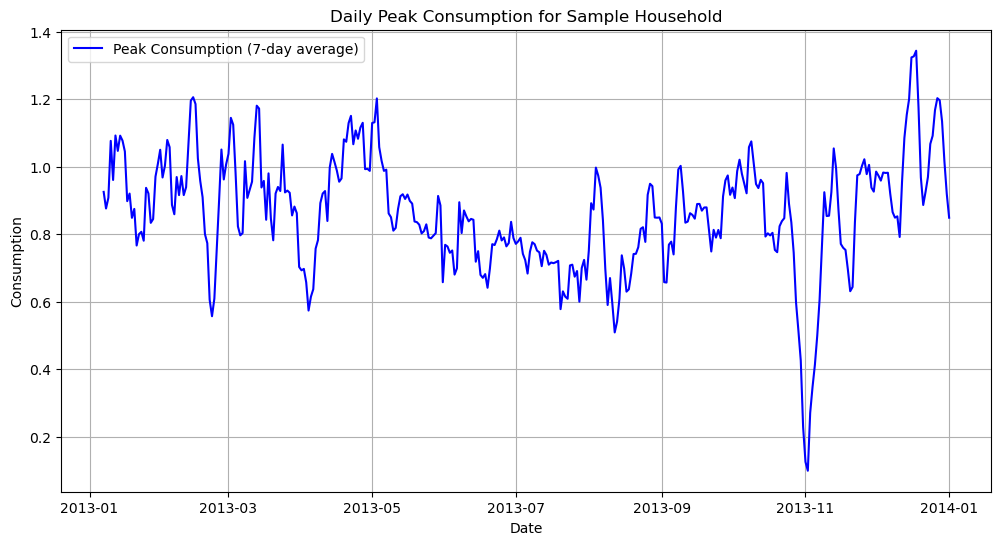

count    360.000000
mean       0.862335
std        0.173351
min        0.098857
25%        0.764036
50%        0.862143
75%        0.972893
max        1.344286
Name: Peak_Consumption, dtype: float64

Date with Highest 7-day Rolling Average: 2013-12-18 00:00:00
Date with Lowest 7-day Rolling Average: 2013-11-02 00:00:00


In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Pick a sample household for demonstration
sample_household = daily_peak_hour[daily_peak_hour['Household_id'] == 'D0000']

# Compute the rolling mean
rolling_mean = sample_household['Peak_Consumption'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sample_household['Date'], rolling_mean, label='Peak Consumption (7-day average)', color='blue')
plt.title('Daily Peak Consumption for Sample Household')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Statistical summary
print(rolling_mean.describe())

# Dates for max and min rolling average
print("\nDate with Highest 7-day Rolling Average:", sample_household['Date'][rolling_mean.idxmax()])
print("Date with Lowest 7-day Rolling Average:", sample_household['Date'][rolling_mean.idxmin()])


In [80]:
sample_household.describe()

,Peak_Hour,Peak_Consumption,Forecast
count,366.000000,366.000000,0.0
mean,16.696721,0.860842,NaN
std,4.634988,0.410862,NaN
min,0.000000,0.087000,NaN
25%,15.250000,0.578250,NaN
50%,18.000000,0.721500,NaN
75%,20.000000,1.121250,NaN
max,23.000000,2.210000,NaN


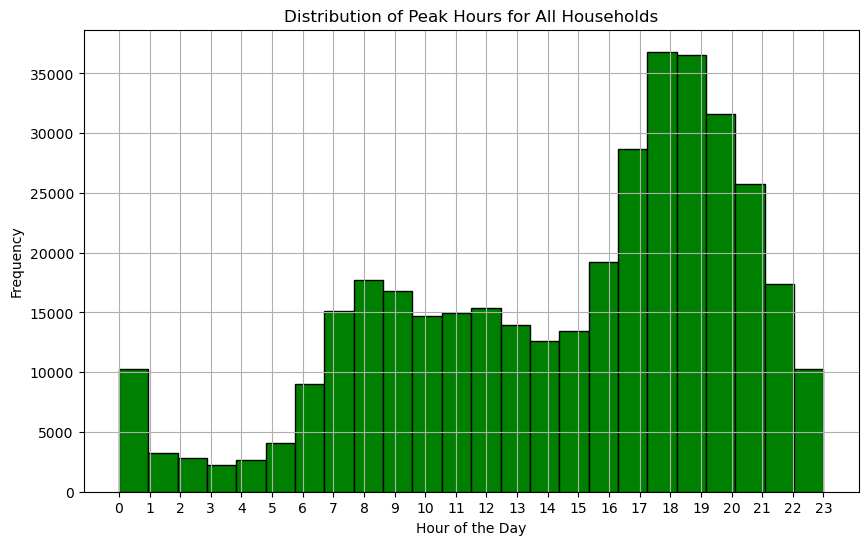

    Hour_Start   Hour_End  Frequency
0     0.000000   0.958333      10233
1     0.958333   1.916667       3269
2     1.916667   2.875000       2863
3     2.875000   3.833333       2200
4     3.833333   4.791667       2638
5     4.791667   5.750000       4095
6     5.750000   6.708333       8999
7     6.708333   7.666667      15105
8     7.666667   8.625000      17720
9     8.625000   9.583333      16759
10    9.583333  10.541667      14670
11   10.541667  11.500000      14931
12   11.500000  12.458333      15335
13   12.458333  13.416667      13981
14   13.416667  14.375000      12585
15   14.375000  15.333333      13442
16   15.333333  16.291667      19219
17   16.291667  17.250000      28691
18   17.250000  18.208333      36815
19   18.208333  19.166667      36511
20   19.166667  20.125000      31623
21   20.125000  21.083333      25783
22   21.083333  22.041667      17397
23   22.041667  23.000000      10286


In [81]:
import numpy as np
import pandas as pd

# Create a histogram for peak hours
plt.figure(figsize=(10, 6))
plt.hist(daily_peak_hour['Peak_Hour'], bins=24, color='green', edgecolor='black')
plt.title('Distribution of Peak Hours for All Households')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Calculate the frequencies and bins
hist, bin_edges = np.histogram(daily_peak_hour['Peak_Hour'], bins=24)

# Create a DataFrame for clearer visualization
hourly_freq_df = pd.DataFrame({
    'Hour_Start': bin_edges[:-1],
    'Hour_End': bin_edges[1:],
    'Frequency': hist
})

# Display the table
print(hourly_freq_df)


In [61]:
daily_peak_hour.describe()


,Peak_Hour,Peak_Consumption
count,375150.000000,375150.000000
mean,14.656327,1.187564
std,5.815284,0.947317
min,0.000000,0.000000
25%,10.000000,0.508000
50%,16.000000,0.970000
75%,19.000000,1.589000
max,23.000000,14.813000


In [19]:
# Weekly aggregate:
weekly_metrics = merged_inner.groupby(['Household_id', pd.Grouper(key='GMT', freq='W')]).agg({
    'Consumption': ['sum', 'mean', 'max', 'min', 'std'],
    'Price': ['mean', 'max', 'min'],
    'Event_tags': ['count']
}).reset_index()

weekly_metrics.columns = ['Household_id', 'Week_Start', 
                          'Weekly_Consumption_Sum', 'Weekly_Consumption_Mean', 'Weekly_Consumption_Max', 'Weekly_Consumption_Min', 'Weekly_Consumption_Std', 
                          'Weekly_Price_Mean', 'Weekly_Price_Max', 'Weekly_Price_Min',
                          'Weekly_Event_Count']

In [20]:
# Monthly aggregate:
monthly_metrics = merged_inner.groupby(['Household_id', pd.Grouper(key='GMT', freq='M')]).agg({
    'Consumption': ['sum', 'mean', 'max', 'min', 'std'],
    'Price': ['mean', 'max', 'min'],
    'Event_tags': ['count']
}).reset_index()

monthly_metrics.columns = ['Household_id', 'Month', 
                           'Monthly_Consumption_Sum', 'Monthly_Consumption_Mean', 'Monthly_Consumption_Max', 'Monthly_Consumption_Min', 'Monthly_Consumption_Std', 
                           'Monthly_Price_Mean', 'Monthly_Price_Max', 'Monthly_Price_Min',
                           'Monthly_Event_Count']

In [21]:
print("First Rows of Daily Metrics:")
daily_metrics.head()

First Rows of Daily Metrics:


,Household_id,Date,Daily_Consumption_Sum,Daily_Consumption_Mean,Daily_Consumption_Max,Daily_Consumption_Min,Daily_Consumption_Std,Daily_Price_Mean,Daily_Price_Max,Daily_Price_Min,Daily_Event_Count
0,D0000,2013-01-01,9.101,0.193638,0.594,0.035,0.136102,0.117600,0.1176,0.1176,0
1,D0000,2013-01-02,6.058,0.126208,0.320,0.029,0.079695,0.117600,0.1176,0.1176,0
2,D0000,2013-01-03,4.841,0.100854,0.341,0.029,0.080496,0.117600,0.1176,0.1176,0
3,D0000,2013-01-04,6.965,0.145104,0.948,0.032,0.166973,0.107887,0.1176,0.0399,6
4,D0000,2013-01-05,3.324,0.069250,0.355,0.028,0.065523,0.117600,0.1176,0.1176,0


In [22]:
print("\nFirst Rows of Weekly Metrics:")
weekly_metrics.head()



First Rows of Weekly Metrics:


,Household_id,Week_Start,Weekly_Consumption_Sum,Weekly_Consumption_Mean,Weekly_Consumption_Max,Weekly_Consumption_Min,Weekly_Consumption_Std,Weekly_Price_Mean,Weekly_Price_Max,Weekly_Price_Min,Weekly_Event_Count
0,D0000,2013-01-06,37.594,0.130990,1.000,0.028,0.126495,0.115976,0.1176,0.0399,6
1,D0000,2013-01-13,48.608,0.144667,1.169,0.029,0.148179,0.155812,0.6720,0.0399,30
2,D0000,2013-01-20,46.406,0.138113,0.993,0.028,0.133345,0.152994,0.6720,0.0399,91
3,D0000,2013-01-27,47.315,0.140818,1.254,0.029,0.137336,0.112281,0.1176,0.0399,23
4,D0000,2013-02-03,53.424,0.159000,1.053,0.028,0.153087,0.122137,0.6720,0.0399,78


In [23]:

print("\nFirst Rows of Monthly Metrics:")
monthly_metrics.head()


First Rows of Monthly Metrics:


,Household_id,Month,Monthly_Consumption_Sum,Monthly_Consumption_Mean,Monthly_Consumption_Max,Monthly_Consumption_Min,Monthly_Consumption_Std,Monthly_Price_Mean,Monthly_Price_Max,Monthly_Price_Min,Monthly_Event_Count
0,D0000,2013-01-31,207.705,0.139681,1.254,0.028,0.137706,0.131505,0.672,0.0399,222
1,D0000,2013-02-28,185.916,0.138330,1.191,0.028,0.139323,0.147734,0.672,0.0399,276
2,D0000,2013-03-31,199.383,0.133994,1.458,0.008,0.136563,0.136678,0.672,0.0399,318
3,D0000,2013-04-30,203.889,0.141590,1.245,0.026,0.141649,0.130209,0.672,0.0399,108
4,D0000,2013-05-31,206.532,0.138798,1.126,0.026,0.140441,0.142004,0.672,0.0399,216


In [63]:
from statsmodels.tsa.arima.model import ARIMA


In [64]:
# Use the daily peak consumption of the sample household 'D0000' as an example
train_data = sample_household['Peak_Consumption']

# Initialize and fit the ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # Example order
model_fit = model.fit()


In [68]:
forecast = model_fit.forecast(steps=30)  # forecasting for 30 days
sample_household = sample_household.copy()
sample_household['Forecast'] = forecast

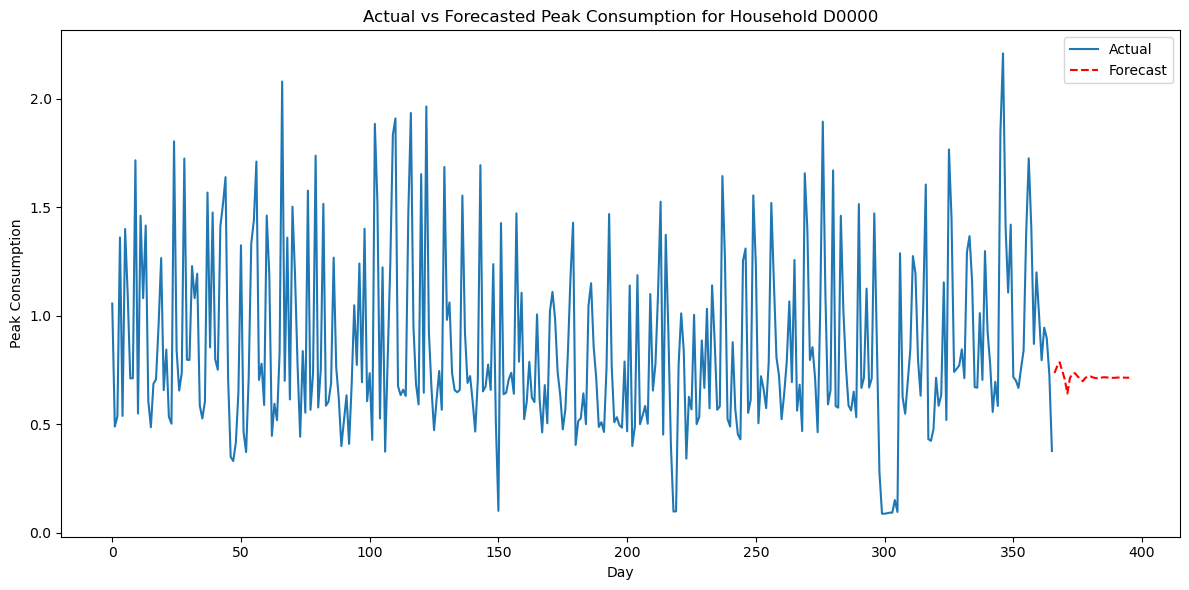

In [78]:
# Just taking one household to validate the forecast visually
household = households_50[0]
household_data = daily_peak_hour[daily_peak_hour['Household_id'] == household].copy()

model = ARIMA(household_data['Peak_Consumption'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(household_data['Peak_Consumption'].index, household_data['Peak_Consumption'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title(f"Actual vs Forecasted Peak Consumption for Household {household}")
plt.xlabel('Day')
plt.ylabel('Peak Consumption')
plt.legend()
plt.tight_layout()
plt.show()


In [74]:
print(community_forecast_50)

53.642182077260074


C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignore

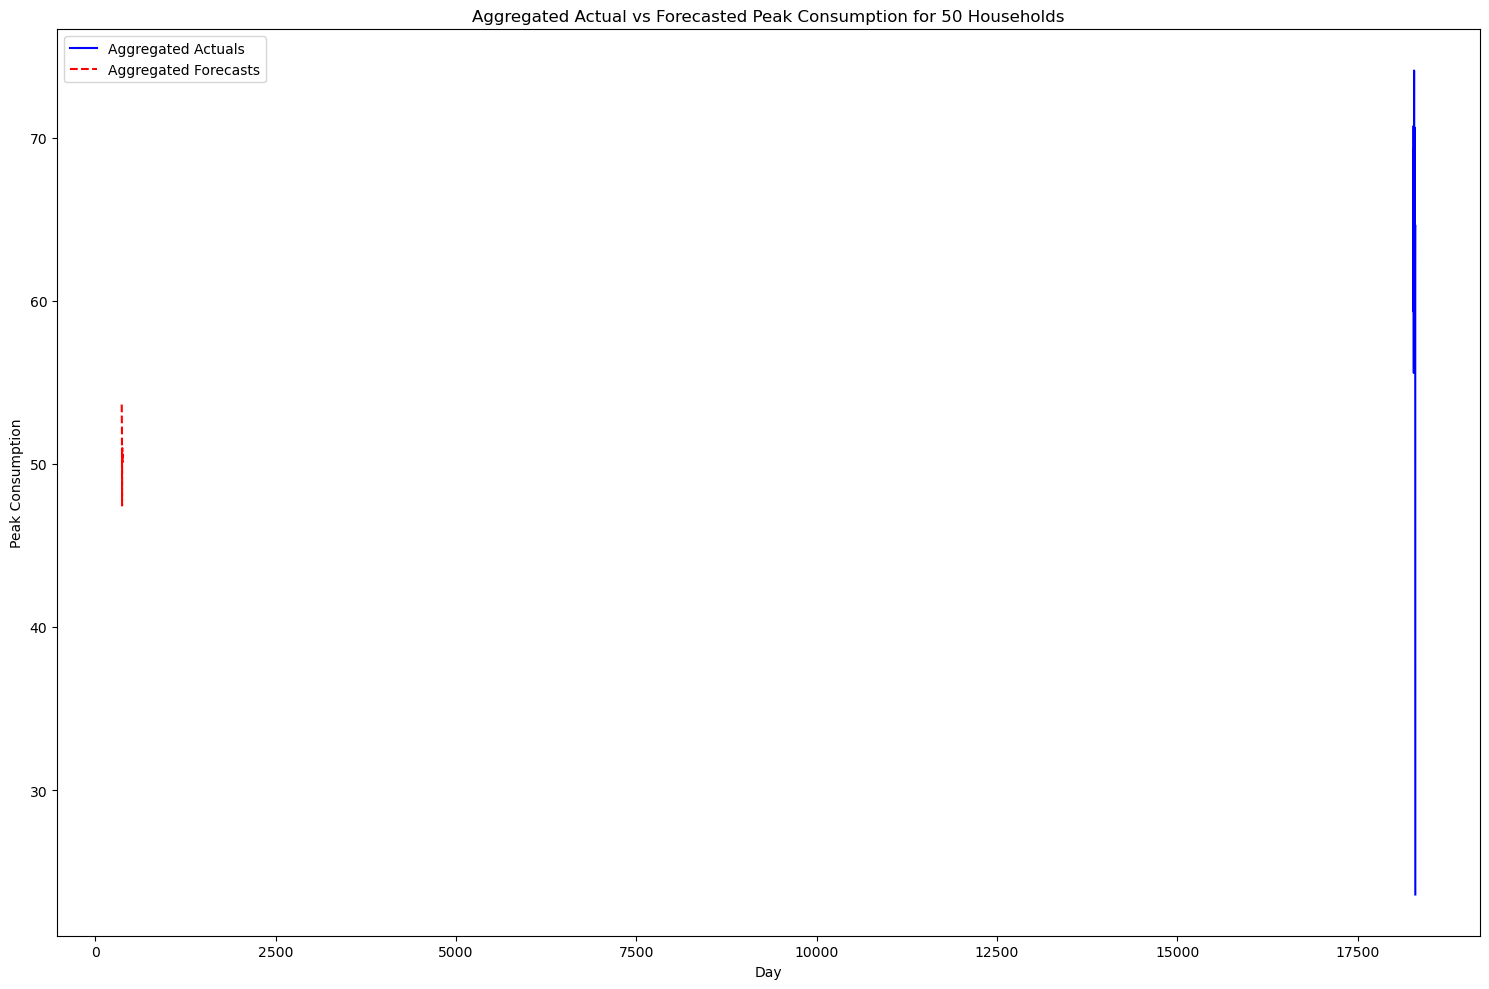

In [79]:
# Storage for aggregated actuals and forecasts
aggregated_actuals = np.zeros(30)
aggregated_forecasts = np.zeros(30)

# Aggregate forecasts and actuals
for household in households_50:
    household_data = daily_peak_hour[daily_peak_hour['Household_id'] == household].copy()
    
    # Actual values for the last 30 days
    aggregated_actuals += household_data['Peak_Consumption'].tail(30).values
    
    # Forecasted values
    model = ARIMA(household_data['Peak_Consumption'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)
    aggregated_forecasts += forecast.values

# Plotting
plt.figure(figsize=(15,10))
plt.plot(household_data['Peak_Consumption'].tail(30).index, aggregated_actuals, label='Aggregated Actuals', color='blue')
plt.plot(forecast.index, aggregated_forecasts, label='Aggregated Forecasts', color='red', linestyle='--')
plt.title('Aggregated Actual vs Forecasted Peak Consumption for 50 Households')
plt.xlabel('Day')
plt.ylabel('Peak Consumption')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignore

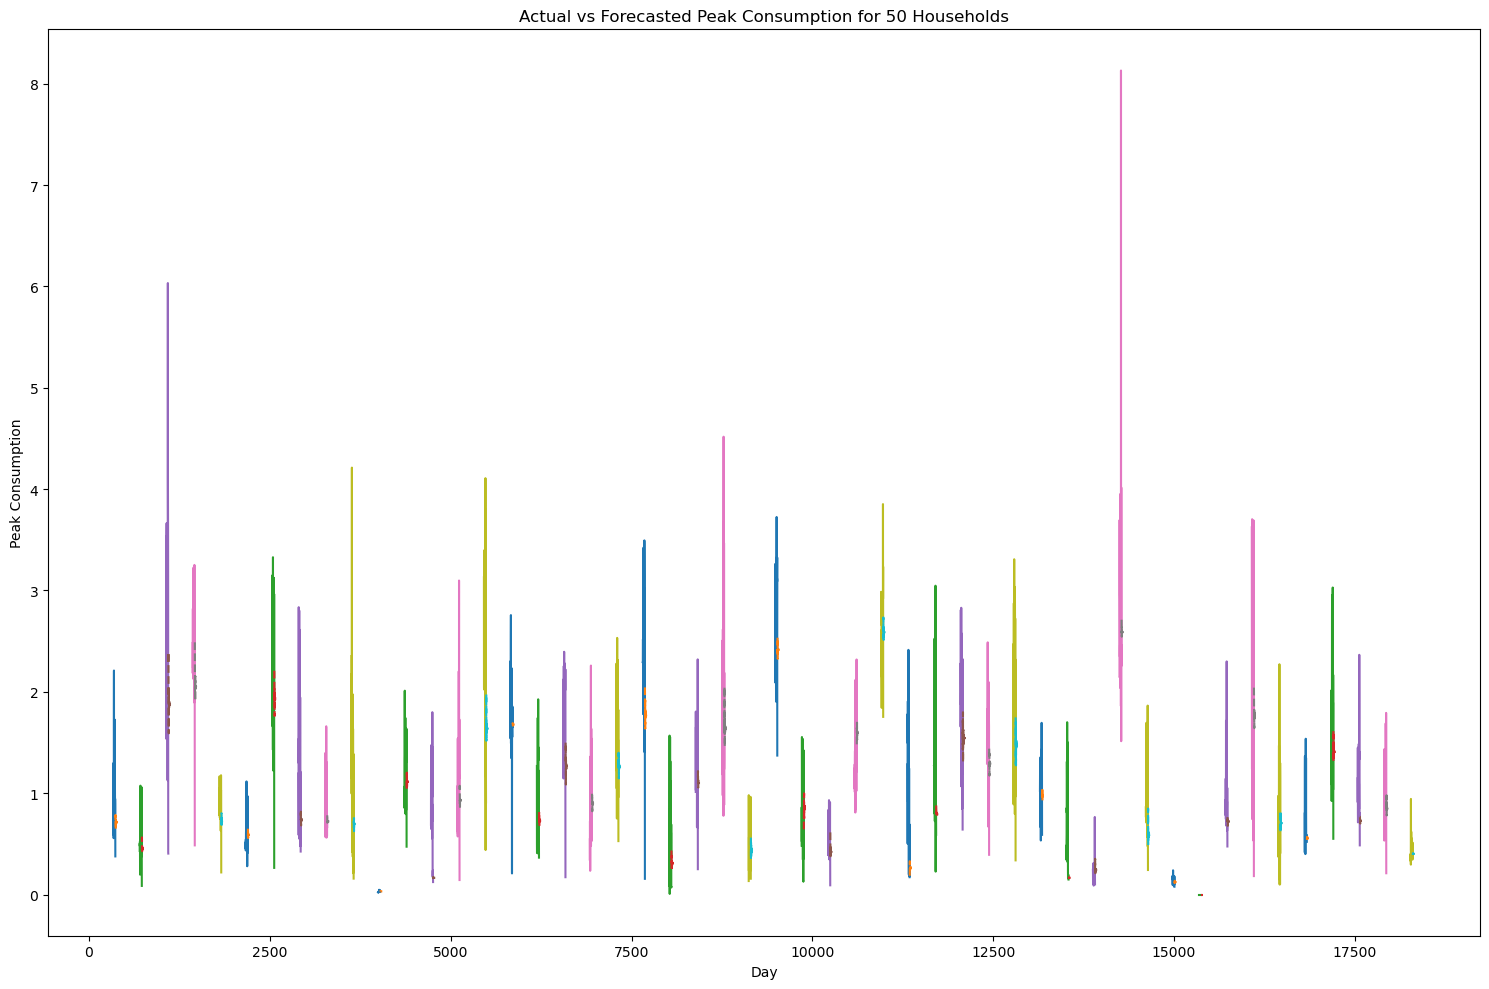

In [76]:
import matplotlib.pyplot as plt

# Get the first 50 households
households_50 = daily_peak_hour['Household_id'].unique()[:50]

plt.figure(figsize=(15,10))

# Iterate through each household to get data and forecast
for household in households_50:
    household_data = daily_peak_hour[daily_peak_hour['Household_id'] == household].copy()
    
    # Actual peak consumption for the last 30 days
    actual_data = household_data['Peak_Consumption'].tail(30)
    
    # Forecasted data for the next 30 days
    model = ARIMA(household_data['Peak_Consumption'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)
    
    # Plotting
    plt.plot(actual_data.index, actual_data, label=f'Actual {household}')
    plt.plot(range(actual_data.index[-1]+1, actual_data.index[-1]+31), forecast, label=f'Forecast {household}', linestyle='--')

# Optional: Limit the number of legend entries for clarity
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.title('Actual vs Forecasted Peak Consumption for 50 Households')
plt.xlabel('Day')
plt.ylabel('Peak Consumption')
plt.tight_layout()
plt.show()


### Analyze the Evolution of Forecasting Methods
##### Descriptive Analysis of Traditional Methods:
We will start by splitting our dataset into training and testing sets. Using the daily metrics, we'll forecast daily consumption sums:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

Basic Linear Regression:

In [25]:
# Convert datetime to ordinal numbers
daily_metrics['Date_ordinal'] = daily_metrics['Date'].apply(lambda x: x.toordinal())

X = daily_metrics['Date_ordinal'].values.reshape(-1, 1)
y = daily_metrics['Daily_Consumption_Sum']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training a Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
lr_preds = lr.predict(X_test)

# Performance metrics
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
lr_mae = mean_absolute_error(y_test, lr_preds)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression MAE:", lr_mae)


Linear Regression RMSE: 8.596616934090479
Linear Regression MAE: 5.324715822451973


Time-Series Analysis with ARIMA

In [26]:
import numpy as np

# Convert series to stationary if needed (e.g., by differencing)
# For simplicity, we are assuming our data is already stationary

y_array = np.array(y)  # Convert y to numpy array

train = y_array[:int(0.8*len(y_array))]
test = y_array[int(0.8*len(y_array)):]

# Train ARIMA
# Convert back to series if necessary (though for ARIMA in statsmodels, numpy arrays should work just fine)
train_series = pd.Series(train)
test_series = pd.Series(test)

# Training an ARIMA Model
model = ARIMA(train_series, order=(1,1,1))
model_fit = model.fit()

forecast_output = model_fit.forecast(steps=len(test))
arima_preds = np.array(forecast_output)  # convert to array

# Performance metrics
arima_rmse = mean_squared_error(test, arima_preds, squared=False)
arima_mae = mean_absolute_error(test, arima_preds)

print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAE:", arima_mae)


ARIMA RMSE: 8.69028731680702
ARIMA MAE: 5.017641789924966


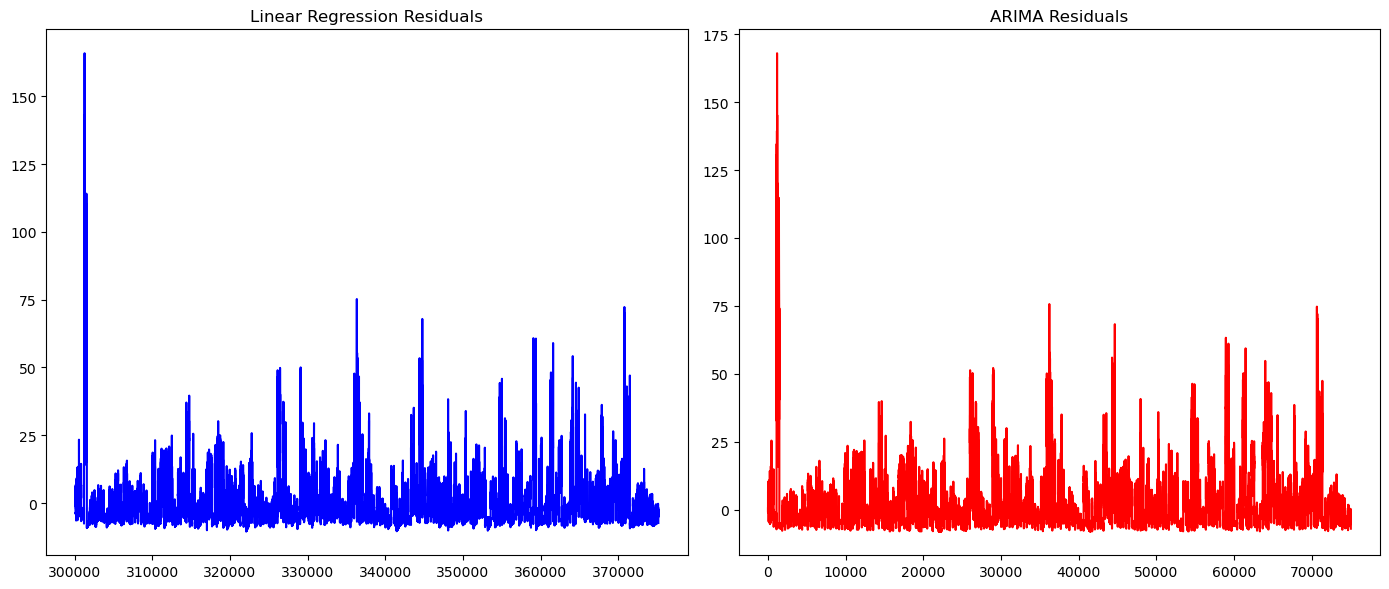

In [27]:
# Linear Regression residuals
lr_residuals = y_test - lr_preds

# ARIMA residuals
arima_residuals = test - arima_preds

# Plotting residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(lr_residuals, color='blue')
plt.title('Linear Regression Residuals')

plt.subplot(1, 2, 2)
plt.plot(arima_residuals, color='red')
plt.title('ARIMA Residuals')
plt.tight_layout()
plt.show()


### Advanced Model Implementation

##### Data Preparation:
For these models, we'll frame the problem as a regression task, predicting the Daily_Consumption_Sum based on the previous days' values. We'll also utilize other features available.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Number of previous days' data to consider
lag = 3

# Create lag features
for i in range(lag):
    daily_metrics[f"lag_{i+1}"] = daily_metrics['Daily_Consumption_Sum'].shift(i+1)

# Drop NaN values
daily_metrics.dropna(inplace=True)

# Features and Target
X = daily_metrics.drop(['Household_id', 'Date', 'Daily_Consumption_Sum'], axis=1).values
y = daily_metrics['Daily_Consumption_Sum'].values

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling data for better performance in models like ANN and SVM
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.reshape(-1, 1))


##### Training Advanced Models:
1. ANN (using TensorFlow's Keras):

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam')

# Train model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, verbose=1)

# Predict
ann_preds_scaled = model.predict(X_test_scaled)
ann_preds = scaler_Y.inverse_transform(ann_preds_scaled)

# Metrics
ann_rmse = mean_squared_error(y_test, ann_preds, squared=False)
ann_mae = mean_absolute_error(y_test, ann_preds)

print("ANN RMSE:", ann_rmse)
print("ANN MAE:", ann_mae)


Epoch 1/100
9325/9325 [==============================] - 42s 4ms/step - loss: 1.4741e-04
Epoch 2/100
9325/9325 [==============================] - 37s 4ms/step - loss: 1.1754e-05
Epoch 3/100
9325/9325 [==============================] - 40s 4ms/step - loss: 9.8483e-06
Epoch 4/100
9325/9325 [==============================] - 36s 4ms/step - loss: 9.0302e-06
Epoch 5/100
9325/9325 [==============================] - 47s 5ms/step - loss: 8.1496e-06
Epoch 6/100
9325/9325 [==============================] - 38s 4ms/step - loss: 7.7796e-06
Epoch 7/100
9325/9325 [==============================] - 42s 5ms/step - loss: 7.5626e-06
Epoch 8/100
9325/9325 [==============================] - 38s 4ms/step - loss: 7.1842e-06
Epoch 9/100
9325/9325 [==============================] - 699s 75ms/step - loss: 7.1421e-06
Epoch 10/100
9325/9325 [==============================] - 21s 2ms/step - loss: 6.8016e-06
Epoch 11/100
9325/9325 [==============================] - 21s 2ms/step - loss: 6.5836e-06
Epoch 12/100
9325

SVM (using scikit-learn):

In [30]:
from sklearn.svm import SVR

# Train and predict
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm.fit(X_train_scaled, y_train_scaled.ravel())
svm_preds_scaled = svm.predict(X_test_scaled)
svm_preds = scaler_Y.inverse_transform(svm_preds_scaled.reshape(-1, 1))

# Metrics
svm_rmse = mean_squared_error(y_test, svm_preds, squared=False)
svm_mae = mean_absolute_error(y_test, svm_preds)

print("SVM RMSE:", svm_rmse)
print("SVM MAE:", svm_mae)


SVM RMSE: 7.324323062753186
SVM MAE: 6.491456851067716


Random Forest (using scikit-learn):

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train and predict
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Metrics
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest MAE:", rf_mae)


Random Forest RMSE: 0.20442919949107535
Random Forest MAE: 0.0070501997399370145


Comparison

In [32]:
print("ANN RMSE:", ann_rmse)
print("ANN MAE:", ann_mae)

print("\n =======================================")

print("SVM RMSE:", svm_rmse)
print("SVM MAE:", svm_mae)

print("\n =======================================")

print("Random Forest RMSE:", rf_rmse)
print("Random Forest MAE:", rf_mae)

ANN RMSE: 0.34789914906028324
ANN MAE: 0.06601499339242455

SVM RMSE: 7.324323062753186
SVM MAE: 6.491456851067716

Random Forest RMSE: 0.20442919949107535
Random Forest MAE: 0.0070501997399370145


 ### Investigate the Role of Feature Engineering
##### Baseline Model:
We will use a simpler model like Linear Regression as the sophisticated models like ANN are time-consuming. Linear Regression will give us a fast benchmark.

First, set up the basic features without the modern variables

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Traditional Features
X = daily_metrics.drop(['Household_id', 'Date', 'Daily_Consumption_Sum'], axis=1).values
y = daily_metrics['Daily_Consumption_Sum'].values

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.reshape(-1, 1))

# Define model
model_baseline = Sequential()
model_baseline.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model_baseline.add(Dense(30, activation='relu'))
model_baseline.add(Dense(1, activation='linear'))

# Compile model
model_baseline.compile(loss='mse', optimizer='adam')

# Train model
model_baseline.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=32, verbose=1)

# Predict
baseline_preds_scaled = model_baseline.predict(X_test_scaled)
baseline_preds = scaler_Y.inverse_transform(baseline_preds_scaled)

# Metrics
baseline_rmse = mean_squared_error(y_test, baseline_preds, squared=False)
baseline_mae = mean_absolute_error(y_test, baseline_preds)

print("Baseline ANN RMSE:", baseline_rmse)
print("Baseline ANN MAE:", baseline_mae)


Epoch 1/10
9325/9325 [==============================] - 37s 4ms/step - loss: 5.2289e-05
Epoch 2/10
9325/9325 [==============================] - 35s 4ms/step - loss: 1.1249e-05
Epoch 3/10
9325/9325 [==============================] - 33s 4ms/step - loss: 9.5289e-06
Epoch 4/10
9325/9325 [==============================] - 34s 4ms/step - loss: 8.8682e-06
Epoch 5/10
9325/9325 [==============================] - 35s 4ms/step - loss: 7.8969e-06
Epoch 6/10
9325/9325 [==============================] - 35s 4ms/step - loss: 7.5318e-06
Epoch 7/10
9325/9325 [==============================] - 35s 4ms/step - loss: 7.4572e-06
Epoch 8/10
9325/9325 [==============================] - 35s 4ms/step - loss: 7.0396e-06
Epoch 9/10
9325/9325 [==============================] - 38s 4ms/step - loss: 6.6622e-06
Epoch 10/10
2332/2332 [==============================] - 7s 3ms/step
Baseline ANN RMSE: 0.4435303699261291
Baseline ANN MAE: 0.0846886921842036


In [34]:
# Adding New Features
X_modern = daily_metrics.drop(['Household_id', 'Date'], axis=1).values

# Splitting and Scaling
X_train_modern, X_test_modern, y_train_modern, y_test_modern = train_test_split(X_modern, y, test_size=0.2, shuffle=False)

X_train_modern_scaled = scaler_X.fit_transform(X_train_modern)
X_test_modern_scaled = scaler_X.transform(X_test_modern)

y_train_modern_scaled = scaler_Y.transform(y_train_modern.reshape(-1, 1))
y_test_modern_scaled = scaler_Y.transform(y_test_modern.reshape(-1, 1))

# Define model
model_modern = Sequential()
model_modern.add(Dense(50, input_dim=X_train_modern_scaled.shape[1], activation='relu'))
model_modern.add(Dense(30, activation='relu'))
model_modern.add(Dense(1, activation='linear'))

# Compile and train
model_modern.compile(loss='mse', optimizer='adam')
model_modern.fit(X_train_modern_scaled, y_train_modern_scaled, epochs=10, batch_size=32, verbose=1)

# Predict
modern_preds_scaled = model_modern.predict(X_test_modern_scaled)
modern_preds = scaler_Y.inverse_transform(modern_preds_scaled)

# Metrics
modern_rmse = mean_squared_error(y_test_modern, modern_preds, squared=False)
modern_mae = mean_absolute_error(y_test_modern, modern_preds)

print("Modern ANN RMSE:", modern_rmse)
print("Modern ANN MAE:", modern_mae)


Epoch 1/10
9325/9325 [==============================] - 37s 4ms/step - loss: 2.6570e-05
Epoch 2/10
9325/9325 [==============================] - 35s 4ms/step - loss: 2.0065e-06
Epoch 3/10
9325/9325 [==============================] - 39s 4ms/step - loss: 9.3406e-07
Epoch 4/10
9325/9325 [==============================] - 36s 4ms/step - loss: 6.6561e-07
Epoch 5/10
9325/9325 [==============================] - 30s 3ms/step - loss: 4.6502e-07
Epoch 6/10
9325/9325 [==============================] - 29s 3ms/step - loss: 4.1297e-07
Epoch 7/10
9325/9325 [==============================] - 29s 3ms/step - loss: 2.3478e-07
Epoch 8/10
9325/9325 [==============================] - 29s 3ms/step - loss: 2.0632e-07
Epoch 9/10
9325/9325 [==============================] - 30s 3ms/step - loss: 1.9330e-07
Epoch 10/10
2332/2332 [==============================] - 6s 2ms/step
Modern ANN RMSE: 0.07796317038087526
Modern ANN MAE: 0.06917502293559971


In [35]:
print(f"Baseline ANN RMSE: {baseline_rmse}")
print(f"Baseline ANN MAE: {baseline_mae}")

print(f"Modern ANN RMSE: {modern_rmse}")
print(f"Modern ANN MAE: {modern_mae}")


Baseline ANN RMSE: 0.4435303699261291
Baseline ANN MAE: 0.0846886921842036
Modern ANN RMSE: 0.07796317038087526
Modern ANN MAE: 0.06917502293559971


### Propose and Evaluate a Unified Multi-Scale Peak Load Forecasting Framework

##### Individual Models for Different Scales:
a. Weekly Forecasting:

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming weekly_metrics is your weekly aggregated data
y_weekly = weekly_metrics['Weekly_Consumption_Sum']
train_weekly = y_weekly[:int(0.8*len(y_weekly))]
test_weekly = y_weekly[int(0.8*len(y_weekly)):]

model_weekly = ARIMA(train_weekly, order=(1,1,1))
model_fit_weekly = model_weekly.fit()

forecast_weekly = model_fit_weekly.forecast(steps=len(test_weekly))

weekly_rmse = mean_squared_error(test_weekly, forecast_weekly, squared=False)
weekly_mae = mean_absolute_error(test_weekly, forecast_weekly)

print("Weekly RMSE:", weekly_rmse)
print("Weekly MAE:", weekly_mae)


Weekly RMSE: 56.51688595104225
Weekly MAE: 35.01220719182605


Monthly Forecasting:

In [37]:
# Assuming monthly_metrics is your monthly aggregated data
y_monthly = monthly_metrics['Monthly_Consumption_Sum']
train_monthly = y_monthly[:int(0.8*len(y_monthly))]
test_monthly = y_monthly[int(0.8*len(y_monthly)):]

model_monthly = ARIMA(train_monthly, order=(1,1,1))
model_fit_monthly = model_monthly.fit()

forecast_monthly = model_fit_monthly.forecast(steps=len(test_monthly))

monthly_rmse = mean_squared_error(test_monthly, forecast_monthly, squared=False)
monthly_mae = mean_absolute_error(test_monthly, forecast_monthly)

print("Monthly RMSE:", monthly_rmse)
print("Monthly MAE:", monthly_mae)


Monthly RMSE: 240.95460077389598
Monthly MAE: 152.8107043238064


In [38]:
print("Weekly RMSE:", weekly_rmse)
print("Weekly MAE:", weekly_mae)

print("Monthly RMSE:", monthly_rmse)
print("Monthly MAE:", monthly_mae)

Weekly RMSE: 56.51688595104225
Weekly MAE: 35.01220719182605
Monthly RMSE: 240.95460077389598
Monthly MAE: 152.8107043238064


In [39]:
# Assuming each dataset has a 'Date' and 'Consumption_Sum' column
# Set the correct indices for each dataframe
daily_metrics.set_index('Date', inplace=True)
weekly_metrics.set_index('Week_Start', inplace=True)
monthly_metrics.set_index('Month', inplace=True)

# For weekly metrics
duplicate_indices = weekly_metrics[weekly_metrics.index.duplicated()]
if not duplicate_indices.empty:
    print("Dropping duplicate indices for weekly metrics...")
    weekly_metrics = weekly_metrics.loc[~weekly_metrics.index.duplicated(keep='first')]

# For monthly metrics
duplicate_indices = monthly_metrics[monthly_metrics.index.duplicated()]
if not duplicate_indices.empty:
    print("Dropping duplicate indices for monthly metrics...")
    monthly_metrics = monthly_metrics.loc[~monthly_metrics.index.duplicated(keep='first')]



# Upsample weekly and monthly data to daily frequency
weekly_metrics_upsampled = weekly_metrics.resample('D').ffill(limit=6)  # fill values for 6 days
monthly_metrics_upsampled = monthly_metrics.resample('D').ffill(limit=29)  # fill values for 29 days




Dropping duplicate indices for weekly metrics...
Dropping duplicate indices for monthly metrics...


Combining data

In [40]:
# Combine upsampled data
# Merge the daily, upsampled weekly, and upsampled monthly dataframes based on their index
combined_data = daily_metrics.join([weekly_metrics_upsampled, monthly_metrics_upsampled], how='outer')

# Now combine the consumption sums
combined_data['Unified_Consumption_Sum'] = (combined_data['Daily_Consumption_Sum'].fillna(0) + 
                                           combined_data['Weekly_Consumption_Sum'].fillna(0) + 
                                           combined_data['Monthly_Consumption_Sum'].fillna(0))

# Check the results
combined_data['Unified_Consumption_Sum'].head()


2013-01-01     7.443
2013-01-01    12.462
2013-01-01     9.434
2013-01-01     8.600
2013-01-01     5.544
Name: Unified_Consumption_Sum, dtype: float64

 ##### Unified Multi-Scale Model:

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sort the DataFrame by date and set the frequency
combined_data = combined_data.sort_index()
combined_data.index = pd.DatetimeIndex(combined_data.index).to_period('D')

# Split the data
train_combined = combined_data['Unified_Consumption_Sum'][:int(0.8*len(combined_data))]
test_combined = combined_data['Unified_Consumption_Sum'][int(0.8*len(combined_data)):]

# Train the ETS model
# Using additive trend and seasonality components as an example
model = ExponentialSmoothing(train_combined, trend="add", seasonal="add", seasonal_periods=30)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_combined))

# Performance metrics
rmse = mean_squared_error(test_combined, forecast, squared=False)
mae = mean_absolute_error(test_combined, forecast)

print("ETS Model RMSE:", rmse)
print("ETS Model MAE:", mae)


C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


ETS Model RMSE: 121.5479044905368
ETS Model MAE: 87.48582017430425


### Questions and Hypotheses Testing

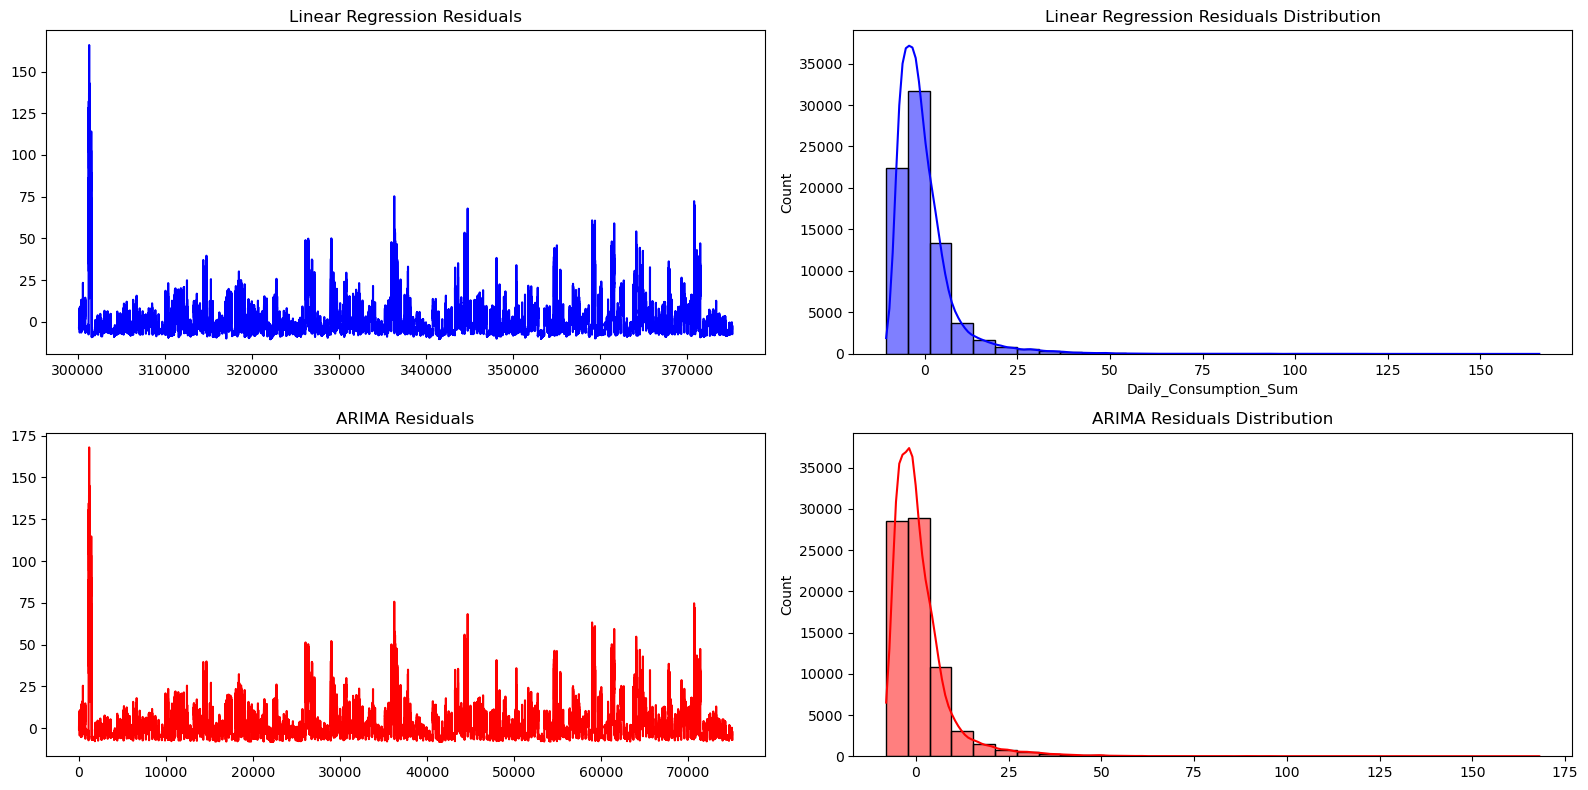

In [42]:
import seaborn as sns

# Plotting residuals for Linear Regression and ARIMA
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(lr_residuals, color='blue')
plt.title('Linear Regression Residuals')

plt.subplot(2, 2, 2)
sns.histplot(lr_residuals, bins=30, color='blue', kde=True)
plt.title('Linear Regression Residuals Distribution')

plt.subplot(2, 2, 3)
plt.plot(arima_residuals, color='red')
plt.title('ARIMA Residuals')

plt.subplot(2, 2, 4)
sns.histplot(arima_residuals, bins=30, color='red', kde=True)
plt.title('ARIMA Residuals Distribution')

plt.tight_layout()
plt.show()


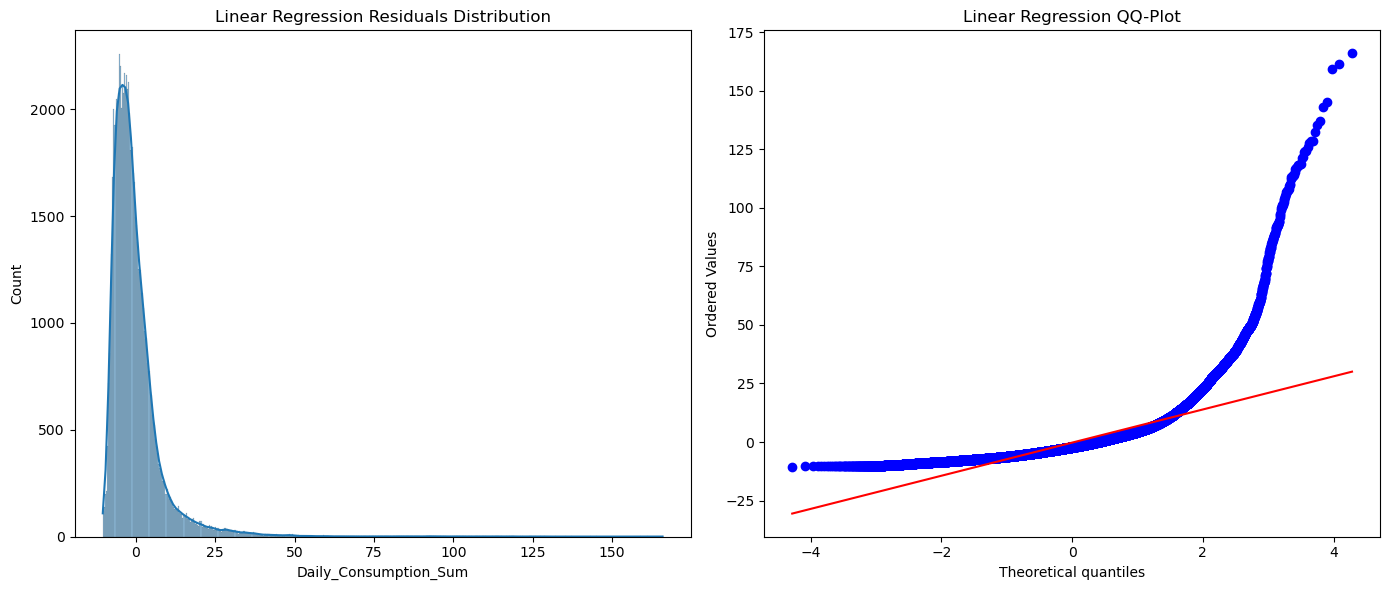

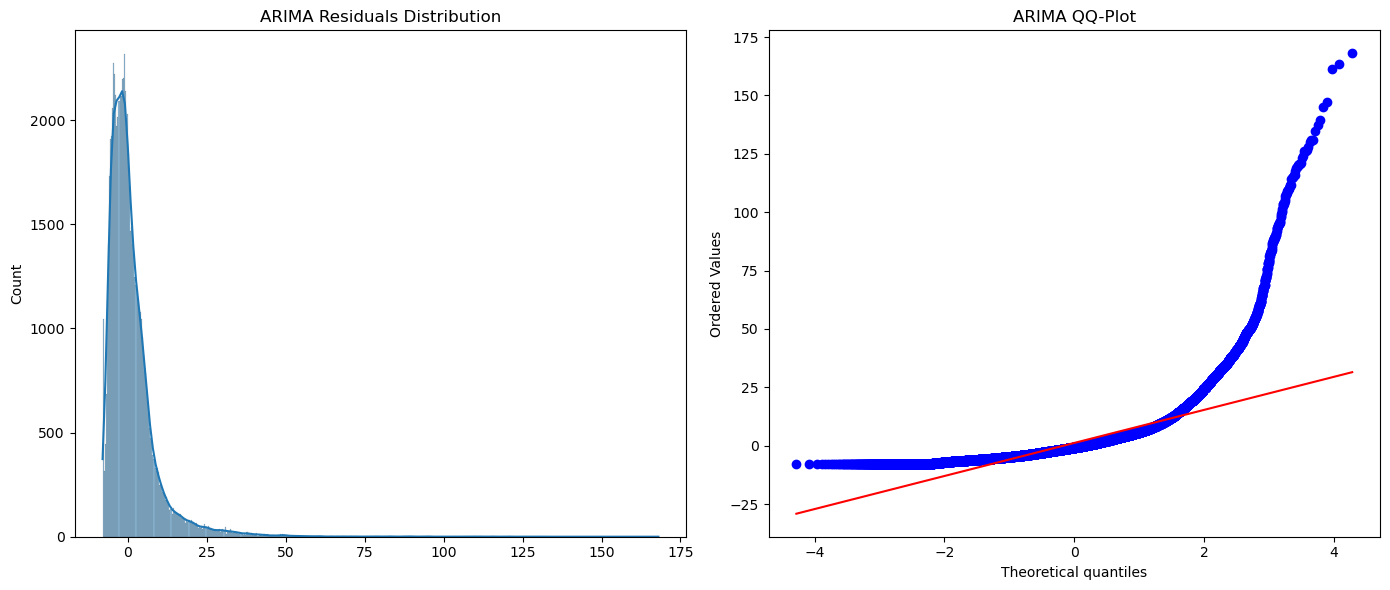

C:\Users\246wi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


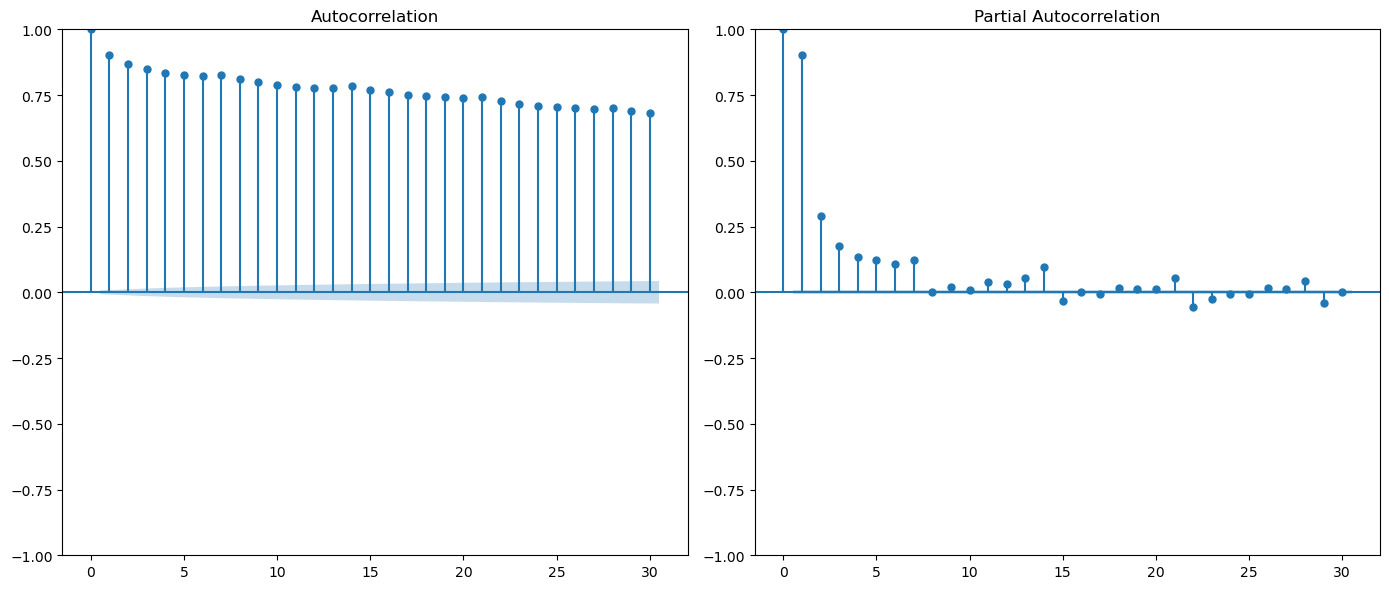

In [43]:
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import probplot

# Linear Regression residuals histogram and QQ-plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(lr_residuals, kde=True)
plt.title('Linear Regression Residuals Distribution')

plt.subplot(1, 2, 2)
probplot(lr_residuals, plot=plt)
plt.title('Linear Regression QQ-Plot')

plt.tight_layout()
plt.show()

# ARIMA residuals histogram and QQ-plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(arima_residuals, kde=True)
plt.title('ARIMA Residuals Distribution')

plt.subplot(1, 2, 2)
probplot(arima_residuals, plot=plt)
plt.title('ARIMA QQ-Plot')

plt.tight_layout()
plt.show()

# ACF and PACF plots for ARIMA residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sm.graphics.tsa.plot_acf(arima_residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(arima_residuals, lags=30, ax=ax[1])
plt.tight_layout()
plt.show()


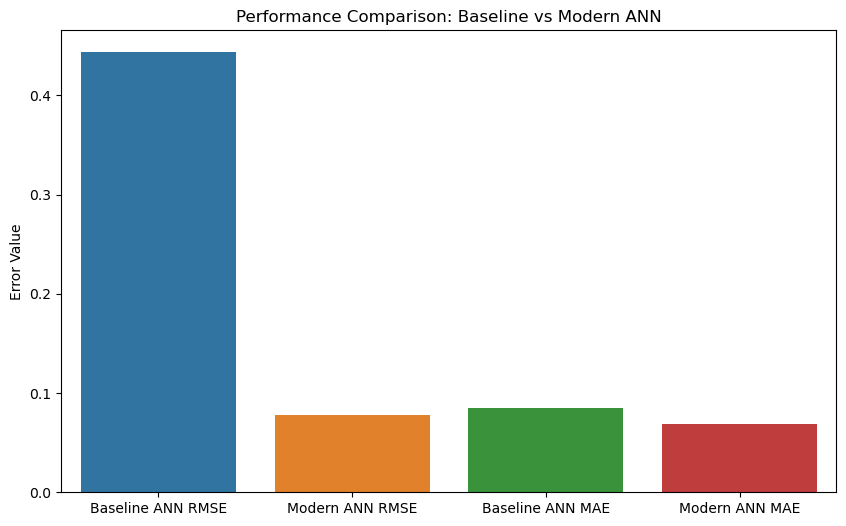

In [44]:
# # Feature Importance for Random Forest
# feature_importance = rf.feature_importances_
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importance, y=X_train.columns)
# plt.title('Random Forest Feature Importance')
# plt.show()

# Comparative Performance Visualization (ANN with and without modern features)
performance_metrics = [baseline_rmse, modern_rmse, baseline_mae, modern_mae]
labels = ['Baseline ANN RMSE', 'Modern ANN RMSE', 'Baseline ANN MAE', 'Modern ANN MAE']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=performance_metrics)
plt.title('Performance Comparison: Baseline vs Modern ANN')
plt.ylabel('Error Value')
plt.show()


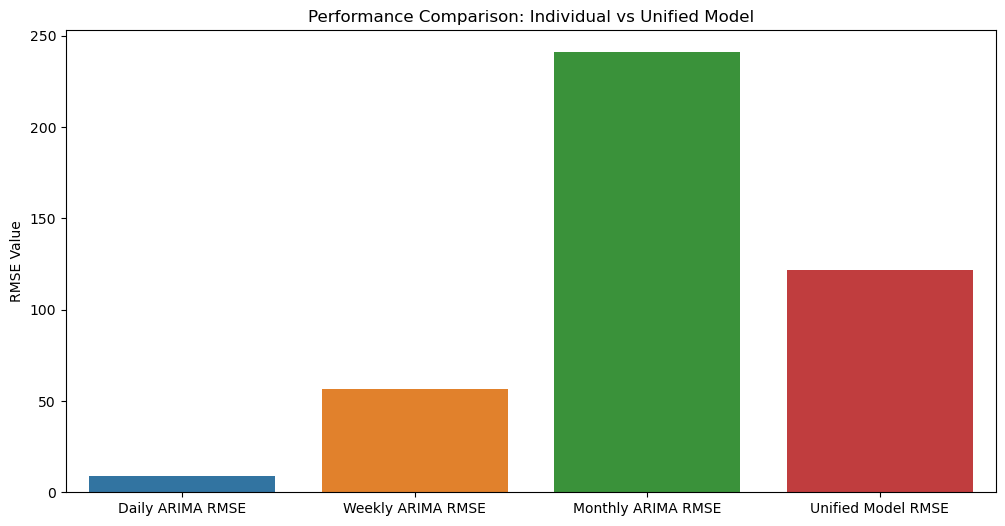

In [45]:
# Comparative Performance Visualization
errors = [arima_rmse, weekly_rmse, monthly_rmse, rmse]
labels = ['Daily ARIMA RMSE', 'Weekly ARIMA RMSE', 'Monthly ARIMA RMSE', 'Unified Model RMSE']

plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=errors)
plt.title('Performance Comparison: Individual vs Unified Model')
plt.ylabel('RMSE Value')
plt.show()


In [47]:
print(baseline_rmse)
print(modern_rmse)


0.4435303699261291
0.07796317038087526
